10%:  46
1%:  504
0.1%:  3942


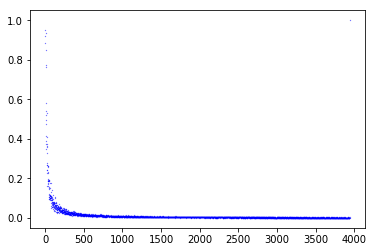

In [2]:
import numpy as np
import matplotlib.pyplot as plt


class Rect:
    def __init__(self, x1=0.0, y1=0.0, x2=0.0, y2=0.0):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
        self.square = 0

    def check_dot(self, dot):
        (x, y) = dot
        return self.x1 <= x <= self.x2 and self.y1 <= y <= self.y2

    def update_bounds(self, dot):
        (x, y) = dot
        if self.x1 > x:
            self.x1 = x
        if self.x2 < x:
            self.x2 = x

        if self.y1 > y:
            self.y1 = y
        if self.y2 < y:
            self.y2 = y

    def reset_bounds(self, x1=0.0, y1=0.0, x2=0.0, y2=0.0):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2

    def plot(self, color='b'):
        plt.plot((self.x1, self.x2, self.x2, self.x1, self.x1), (self.y1, self.y1, self.y2, self.y2, self.y1),
                 color=color)

    def calculate_square(self):
        if self.x2 <= self.x1 or self.y2 <= self.y1:
            return 0
        self.square = (self.x2 - self.x1) * (self.y2 - self.y1)
        return self.square


def create_marks(S, square: Rect):
    marks = [0.0]*len(S)
    for i in range(0, len(S), 1):
        mark = 1 if square.check_dot(S[i]) else 0
        marks[i] = mark
    return marks


def calculate_true_risk(hypotesa: Rect, true_rect: Rect):
    return 1 - hypotesa.square / true_rect.square

M = 10000
main_rect = Rect(0, 0, 1, 1)
main_rect.calculate_square()

q_side = 0.5 ** 0.5
q_rect = Rect(0, 0, q_side, q_side)
q_rect.square = 0.5

h_rect = Rect()
risk_list = [1.0]*M
indexes_list = list(range(1, M + 1, 1))

threshold1 = 0.1
threshold2 = 0.01
threshold3 = 0.001

stepsNumber = 5

for m in range(1, M + 1, 1):
    steps = 0
    true_risk = 0

    while steps < stepsNumber:
        S = np.random.uniform(0, 1, (m, 2))
        Y = create_marks(S, q_rect)
        h_rect.reset_bounds(1, 1, 0, 0)
        for i in range(0, len(S), 1):
            if Y[i] == 1:
                h_rect.update_bounds(S[i])
        h_rect.calculate_square()
        true_risk = true_risk + calculate_true_risk(h_rect, q_rect)
        steps += 1
    true_risk = true_risk/stepsNumber

    if true_risk <= threshold3:
        print('0.1%: ', m)
        threshold3 = -1
        M = m
        break
    elif true_risk <= threshold2:
        print('1%: ', m)
        threshold2 = -1
    elif true_risk <= threshold1:
        print('10%: ', m)
        threshold1 = -1
    risk_list[m-1] = true_risk


plt.scatter(indexes_list[1:M], risk_list[1:M], s=0.05, facecolors='b', edgecolors='b')

plt.show()
